In [ ]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

In [2]:
DEVICE = 'cuda:0'
MAX_EPOCHS = 100
EXPECTED_N = 10000

## Torus model

In [3]:
def model(params, center = np.array([0.6, 0.8])):
    a, b, c = params['a'], params['b'], params['c']
    r = ((a-center[0])**2+(b-center[1])**2)**0.5  # Return radial distance from center
    x = np.array([a, r, c])
    return dict(x=x)

def noise(obs, params, noise = np.array([0.03, 0.005, 0.2])):
    x = obs['x']
    n = np.random.randn(*x.shape)*noise
    return dict(x = x + n)

par0 = dict(a=0.57, b=0.8, c=1.0)
obs0 = model(par0)  # Using Asimov data

In [4]:
cache = swyft.MemoryCache(params = ['a', 'b', 'c'], obs_shapes = dict(x=(3,)))

Creating new cache.


In [5]:
prior = swyft.Prior({"a": ["uniform", 0., 1.], "b": ["uniform",  0., 1.], "c": ["uniform", 0., 1.]})

## Inference

In [10]:
s = swyft.SWYFT(model, noise, prior, cache, obs0, device = DEVICE)
s.infer1d(Ninit = 5000, max_rounds = 10, train_args = dict(batch_size = 32), tail_args = dict(p=0.1, tail_features = False, n_tail_features=1, n_hidden = 128))

N = 5000
Round: 1
No new simulator runs required.
No simulations required.
n_features = 3
Start training
LR iteration 0
Validation loss: 2.491499289870262
Validation loss: 2.332959234714508
Validation loss: 2.2033871486783028
Validation loss: 2.152892865240574
Validation loss: 2.136660061776638
Validation loss: 2.1432131230831146
Total epochs: 6
LR iteration 1
Validation loss: 2.0708163678646088
Validation loss: 2.0861985608935356
Total epochs: 2
LR iteration 2
Validation loss: 2.0905985459685326
Validation loss: 2.081664629280567
Validation loss: 2.0588727593421936
Validation loss: 2.02508258074522
Validation loss: 2.075167551636696
Total epochs: 5
Volume shrinkage: 0.11853675698825515
N = 5296
Round: 2


Simulate:   0%|          | 0/84 [00:00<?, ?it/s]

Adding 84 new samples. Run simulator!


Simulate: 100%|██████████| 84/84 [00:00<00:00, 771.24it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 3.1386420875787735
Validation loss: 3.0048582404851913
Validation loss: 2.9901496320962906
Validation loss: 2.905183658003807
Validation loss: 2.9421634823083878
Total epochs: 5
LR iteration 1
Validation loss: 2.8588573783636093
Validation loss: 2.9480815678834915
Total epochs: 2
LR iteration 2
Validation loss: 2.8669262528419495
Validation loss: 2.8401931077241898
Validation loss: 2.8758966624736786
Total epochs: 3
Volume shrinkage: 0.5271032766789041
N = 6691
Round: 3


Simulate:   0%|          | 0/370 [00:00<?, ?it/s]

Adding 370 new samples. Run simulator!


Simulate: 100%|██████████| 370/370 [00:00<00:00, 787.85it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 3.177442720958165
Validation loss: 3.1595205125354586
Validation loss: 3.1069466272989907
Validation loss: 3.0967544941675094
Validation loss: 3.008788619722639
Validation loss: 2.981172561645508
Validation loss: 2.9416387989407493
Validation loss: 2.9522022065662203
Total epochs: 8
LR iteration 1
Validation loss: 2.955672014327276
Validation loss: 2.914998701640538
Validation loss: 2.9465111437298
Total epochs: 3
LR iteration 2
Validation loss: 2.950711976914179
Validation loss: 2.9154885609944663
Validation loss: 2.954250210807437
Total epochs: 3
Volume shrinkage: 0.4526283849161957
N = 8205
Round: 4


Simulate:   0%|          | 0/3335 [00:00<?, ?it/s]

Adding 3335 new samples. Run simulator!


Simulate: 100%|██████████| 3335/3335 [00:04<00:00, 831.59it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 3.2936432456970213
Validation loss: 3.216503076553345
Validation loss: 3.1840066432952883
Validation loss: 3.118360710144043
Validation loss: 3.1323225784301756
Total epochs: 5
LR iteration 1
Validation loss: 3.156498041152954
Validation loss: 3.1017150592803957
Validation loss: 3.1178484058380125
Total epochs: 3
LR iteration 2
Validation loss: 3.137937755584717
Validation loss: 3.1042214679718017
Validation loss: 3.1081062889099123
Total epochs: 3
Volume shrinkage: 0.9198984151164639


In [11]:
s.infer2d(N = 20000, train_args = dict(batch_size=64), tail_args = dict(p = 0.1, n_tail_features = 3, tail_features = False, n_hidden = 256))

N = 20000
Round: 5
Adding 12461 new samples. Run simulator!


Simulate: 100%|██████████| 12461/12461 [00:15<00:00, 826.16it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 5.869745192989226
Validation loss: 5.515044996815343
Validation loss: 5.439040445512341
Validation loss: 5.3674878305004485
Validation loss: 5.341335496594829
Validation loss: 5.300814136382072
Validation loss: 5.245233366566319
Validation loss: 5.245532743392452
Total epochs: 8
LR iteration 1
Validation loss: 5.224216876491424
Validation loss: 5.178366230380151
Validation loss: 5.139220037767964
Validation loss: 5.187978190760458
Total epochs: 4
LR iteration 2
Validation loss: 5.188093200806649
Validation loss: 5.182459492837229
Validation loss: 5.165337562561035
Validation loss: 5.166463175127583
Total epochs: 4


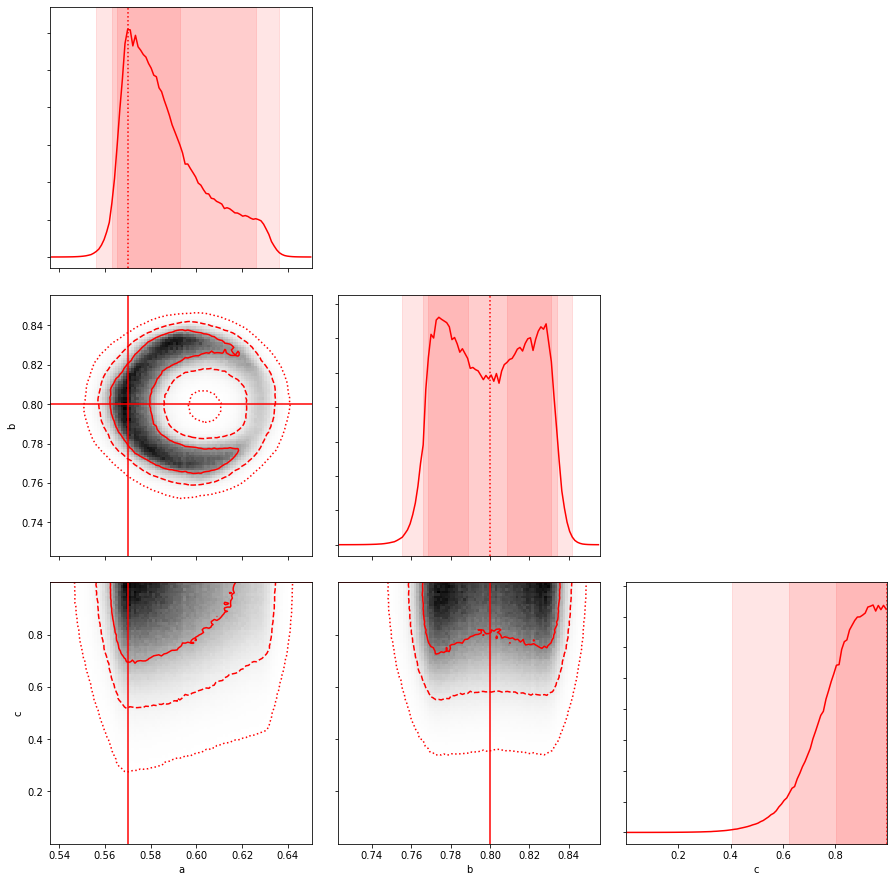

In [13]:
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 20000
Round: 6
Adding 9197 new samples. Run simulator!


Simulate: 100%|██████████| 9197/9197 [00:11<00:00, 834.64it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 5.845454927474734
Validation loss: 5.567270604390947
Validation loss: 5.512848558880034
Validation loss: 5.413183159298367
Validation loss: 5.434927228897337
Total epochs: 5
LR iteration 1
Validation loss: 5.436233800555033
Validation loss: 5.459361061217293
Total epochs: 2
LR iteration 2
Validation loss: 5.36964924373324
Validation loss: 5.334430164761013
Validation loss: 5.308911596025739
Validation loss: 5.343706342909071
Total epochs: 4


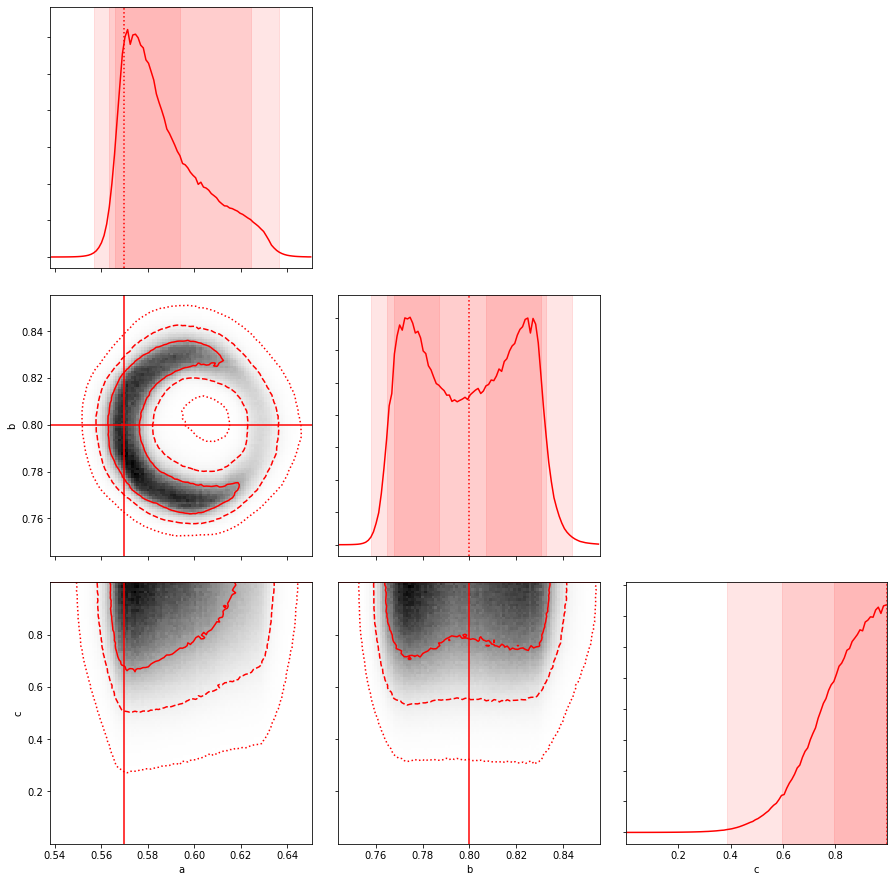

In [14]:
s.infer2d(N = 20000, train_args = dict(batch_size=32), tail_args = dict(p = 0.1, n_tail_features = 3, tail_features = False, n_hidden = 256))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 20000
Round: 7
Adding 3690 new samples. Run simulator!


Simulate: 100%|██████████| 3690/3690 [00:04<00:00, 801.06it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 5.962220638275147
Validation loss: 5.948538991928101
Validation loss: 5.841039005279541
Validation loss: 5.718020473480225
Validation loss: 5.746768156051636
Total epochs: 5
LR iteration 1
Validation loss: 5.69556654548645
Validation loss: 5.765625881195068
Total epochs: 2
LR iteration 2
Validation loss: 5.685710237503052
Validation loss: 5.673754198074341
Validation loss: 5.621261865615844
Validation loss: 5.636656072616577
Total epochs: 4


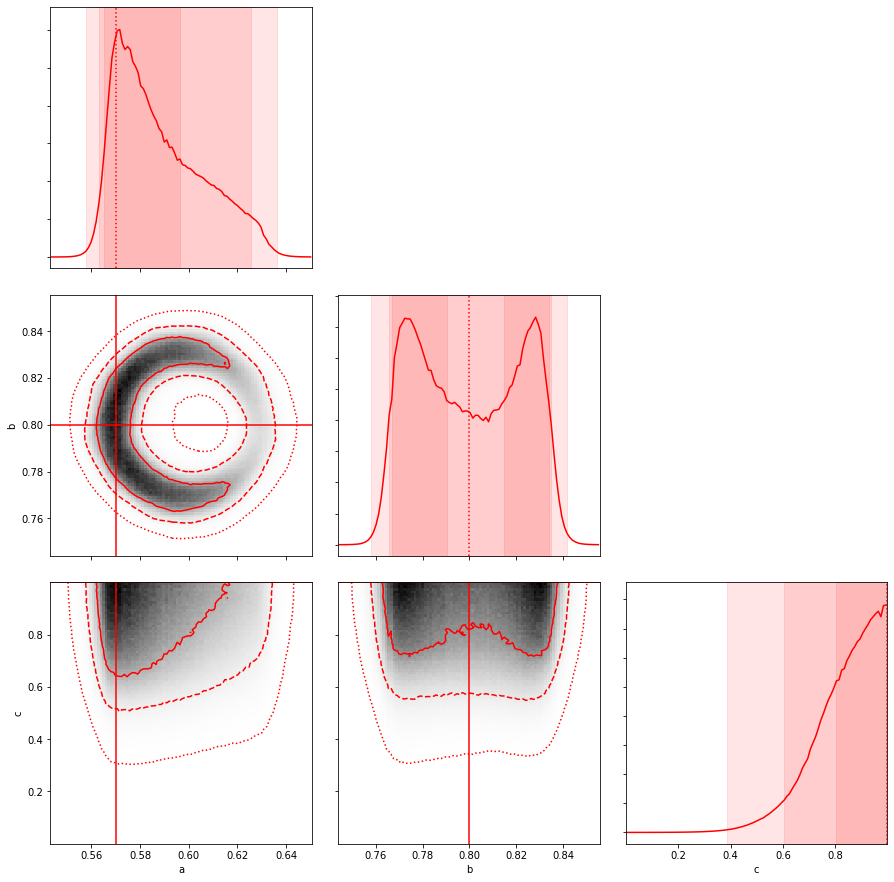

In [15]:
s.infer2d(N = 20000, train_args = dict(batch_size=16), tail_args = dict(p = 0.1, n_tail_features = 3, tail_features = False, n_hidden = 256))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 20000
Round: 8
Adding 860 new samples. Run simulator!


Simulate: 100%|██████████| 860/860 [00:01<00:00, 846.49it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.402900215148926
Validation loss: 5.998306858062744
Validation loss: 5.951190261840821
Validation loss: 5.814660697937012
Validation loss: 5.815494514465332
Total epochs: 5
LR iteration 1
Validation loss: 5.7112503967285155
Validation loss: 5.791394798278809
Total epochs: 2
LR iteration 2
Validation loss: 5.8071905040740965
Validation loss: 5.783275051116943
Validation loss: 5.854126956939697
Total epochs: 3


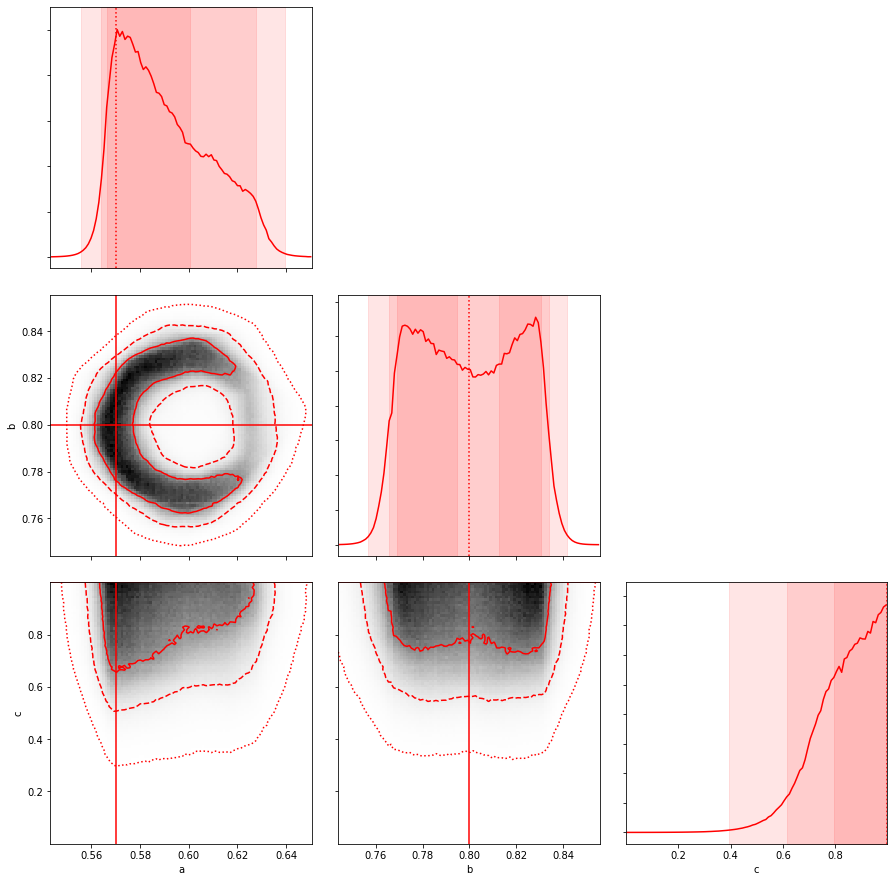

In [16]:
s.infer2d(N = 20000, train_args = dict(batch_size=16), tail_args = dict(p = 0.2, n_tail_features = 3, tail_features = False, n_hidden = 64))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 20000
Round: 9
Adding 306 new samples. Run simulator!


Simulate: 100%|██████████| 306/306 [00:00<00:00, 832.33it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.329716692882705
Validation loss: 6.100074134499903
Validation loss: 5.920464536583281
Validation loss: 6.005570899917785
Total epochs: 4
LR iteration 1
Validation loss: 5.940670512112013
Validation loss: 5.94016731687751
Validation loss: 5.882526328364216
Validation loss: 5.875212705467802
Validation loss: 5.840623158382704
Validation loss: 5.849932636397768
Total epochs: 6
LR iteration 2
Validation loss: 5.908628100892937
Validation loss: 5.831147897765931
Validation loss: 5.907495370424126
Total epochs: 3


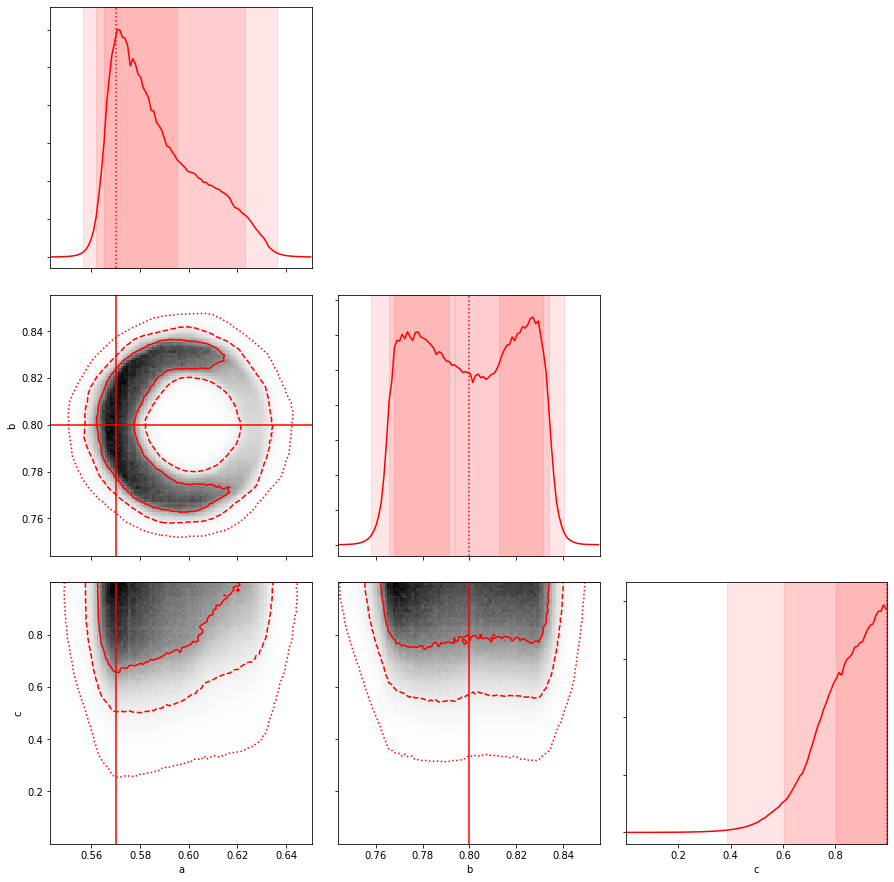

In [17]:
s.infer2d(N = 20000, train_args = dict(batch_size=8), tail_args = dict(p = 0.2, n_tail_features = 3, tail_features = False, n_hidden = 64))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 20000
Round: 11
No new simulator runs required.
No simulations required.
n_features = 3
Start training
LR iteration 0
Validation loss: 6.3257399143711215
Validation loss: 6.1096840366240475
Validation loss: 6.002908406719085
Validation loss: 6.03134112973367
Total epochs: 4
LR iteration 1
Validation loss: 5.947108768647717
Validation loss: 5.910940462543119
Validation loss: 5.915416156091998
Total epochs: 3
LR iteration 2
Validation loss: 5.904940605163574
Validation loss: 5.8757527566725205
Validation loss: 5.88576784441548
Total epochs: 3


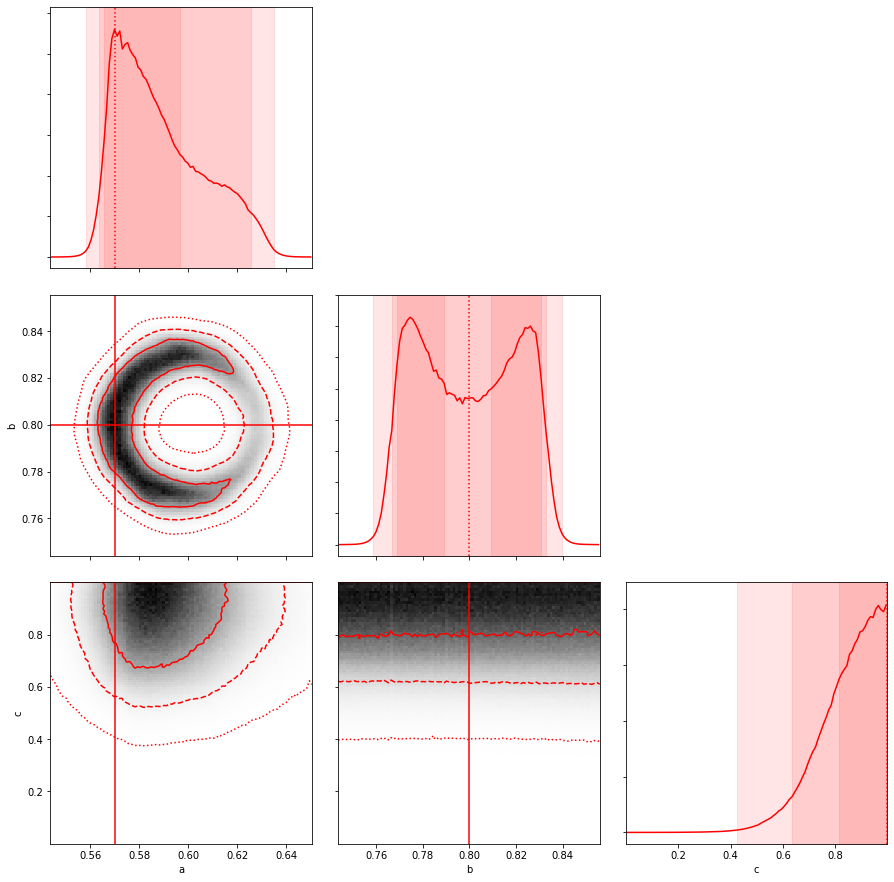

In [28]:
s.infer2d(N = 20000, train_args = dict(batch_size=32), tail_args = dict(p = 0.0, n_tail_features = 3, tail_features = True))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 20000
Round: 12
No new simulator runs required.
No simulations required.
n_features = 3
Start training
LR iteration 0
Validation loss: 6.260139496095719
Validation loss: 6.116933091994254
Validation loss: 6.078397958509384
Validation loss: 6.029708839231922
Validation loss: 5.967198779506068
Validation loss: 5.971596740907239
Total epochs: 6
LR iteration 1
Validation loss: 5.9358696937561035
Validation loss: 5.9137679684546685
Validation loss: 5.9329833446010465
Total epochs: 3
LR iteration 2
Validation loss: 5.905895087026781
Validation loss: 5.871303427603937
Validation loss: 5.870066273596979
Validation loss: 5.841990940032467
Validation loss: 5.880466691909298
Total epochs: 5


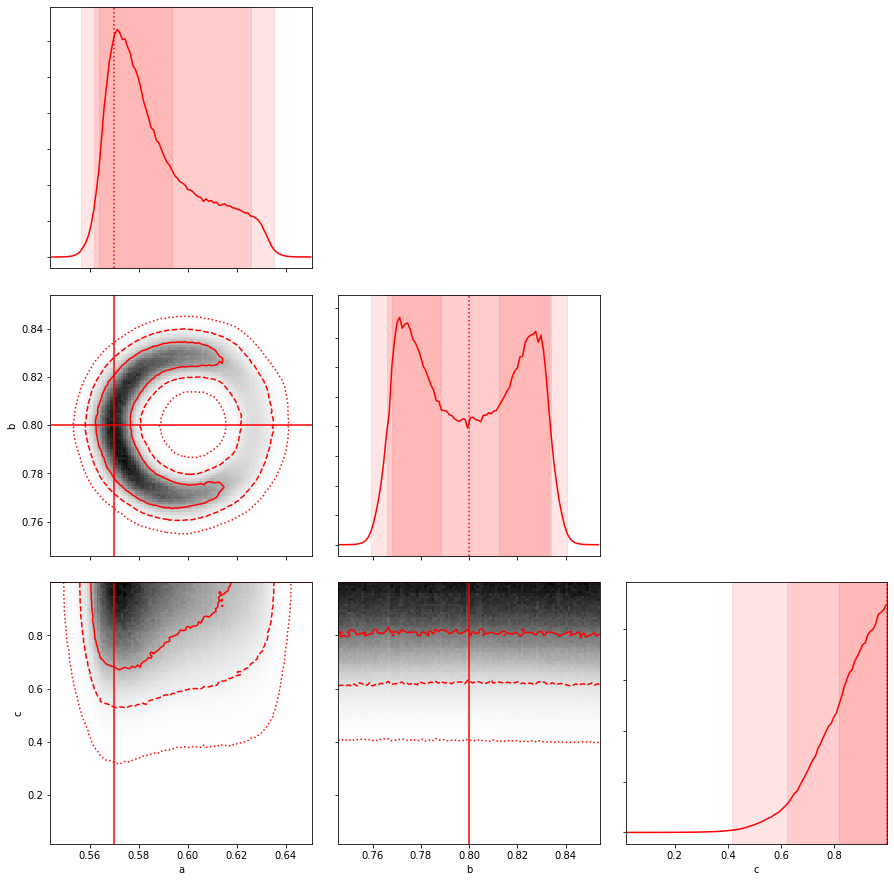

In [30]:
s.infer2d(N = 20000, train_args = dict(batch_size=32), tail_args = dict(p = 0.0, n_tail_features = 3, tail_features = True))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 20000
Round: 13
Adding 991 new samples. Run simulator!


Simulate: 100%|██████████| 991/991 [00:01<00:00, 798.18it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.044420757601338
Validation loss: 5.942045757847447
Validation loss: 5.879572553019369
Validation loss: 5.936187528794812
Total epochs: 4
LR iteration 1
Validation loss: 5.782166619454661
Validation loss: 5.734850183609994
Validation loss: 5.826463837777415
Total epochs: 3
LR iteration 2
Validation loss: 5.823692383304719
Validation loss: 5.824930890913932
Total epochs: 2


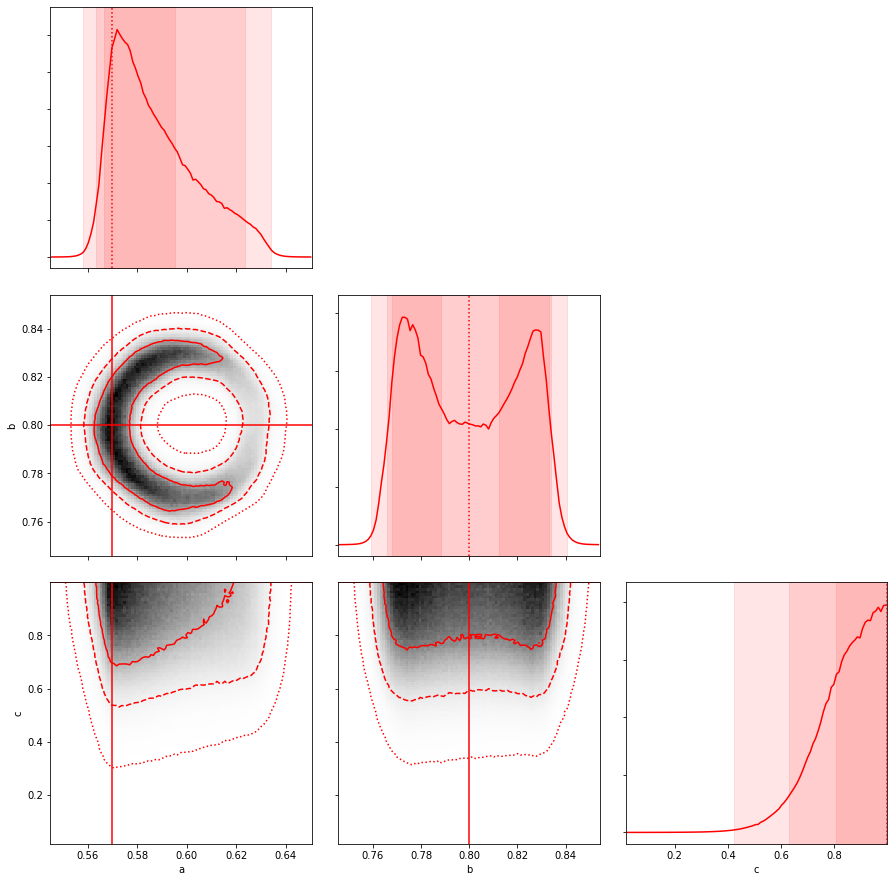

In [31]:
s.infer2d(N = 20000, train_args = dict(batch_size=32), tail_args = dict(p = 0.0, n_tail_features = 3, tail_features = False))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

In [ ]:
s.infer2d(N = 20000, train_args = dict(batch_size=32), tail_args = dict(p = 0.0, n_tail_features = 3, tail_features = True))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 20000
Round: 14
Adding 42 new samples. Run simulator!


Simulate: 100%|██████████| 42/42 [00:00<00:00, 783.30it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 5.92373332669658
Validation loss: 5.840778666157877
Validation loss: 5.825482445378458
Validation loss: 5.8169381849227415
Validation loss: 5.750865836297312
Validation loss: 5.692108984916441
Validation loss: 5.749291081582347
Total epochs: 7
LR iteration 1
Validation loss: 5.7094285257401
Validation loss: 5.6510284639173936
Validation loss: 5.680308203543386
Total epochs: 3
LR iteration 2
Validation loss: 5.674220738872405
Validation loss: 5.5952018614738215
Validation loss: 5.660578266266854
Total epochs: 3


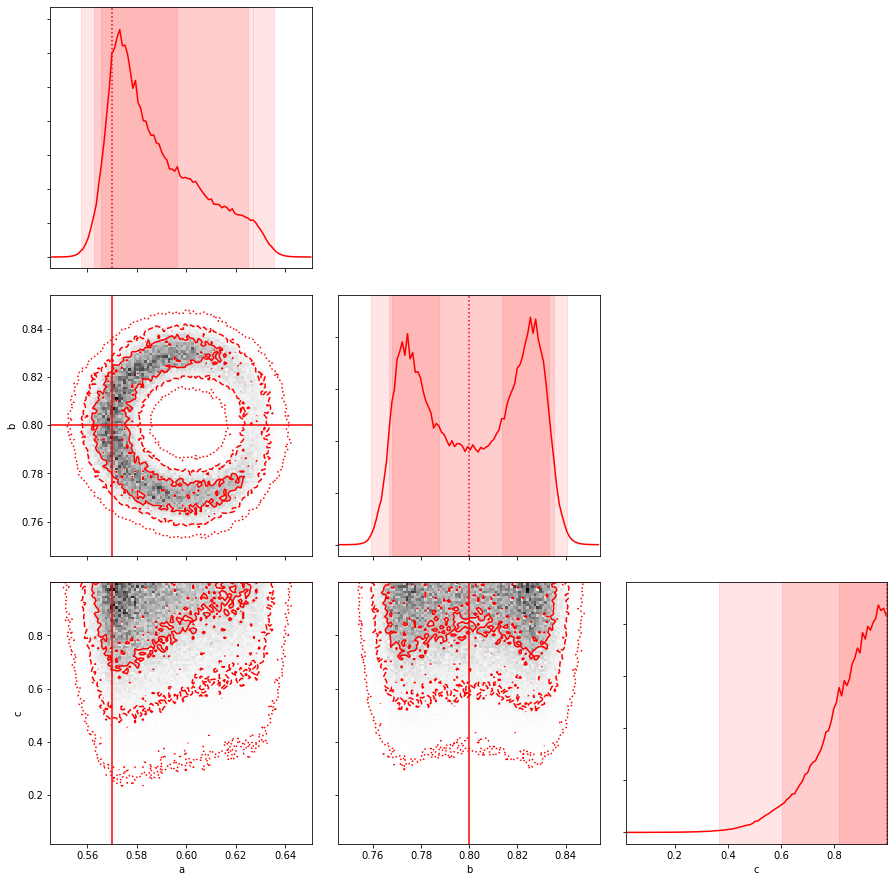

In [32]:
s.infer2d(N = 20000)
post = s.posteriors()
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)